<h2>Agrupamento c-means não supervisinado</h2>
<h3>Vitor Martins Soares</h3>

Agrupamento de amostras servem para classificar e generalizar dados, neste código vamos simular o agrupamento cmeans não supervisionado. Será gerado 3 centros para tentar classificar, quando uma amostra está associada a um centro, ela é classificada por aquele grupo, utiliza-se a distância dos centros para classificar a qual centro uma amostra pertence, isto é, o centro mais próximo de uma amostra é o qual ela pertence, é a classificação desta amostra.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random

Esta é a função para calcular a distancia de dois pontos, sendo um deles uma amostra e o outro um dos centros gerados. O retorno é utilizado para definir a qual centro o ponto é associado.

In [2]:
def distancia(x1,y1,x2,y2):
  return ((x2-x1)**2+(y2-y1)**2)**0.5

Esta é uma função que soma todos os valores do X ou do Y de um ponto de um determinado centro, para realizar a média e redirecionar o ponto, explicarei melhor o uso mais a frente.

In [3]:
def soma(v,t,p):
  valor = 0
  for i in range(len(v)):
    if(p[i]==t):
      valor+=v[i]
  return valor

Aqui são sorteados 30 pontos. Destes 30 pontos, 10 variam o x entre 0 e 5 e o y entre 0 e 5, 10 variam o x entre 4 e 9 e o y em 4 e 9, 10 variam o x entre 9 e 12 e o y entre 0 e 5, como mostra o gráfico abaixo, para fazer com que o agrupamento seja realizado dentre esses 3 grupos.

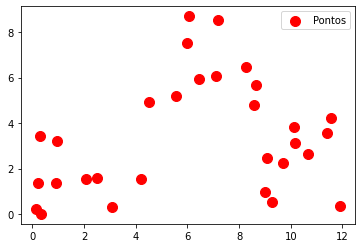

In [4]:
cx = list()
cy = list()
for i in range(10):
  cx.append(random.uniform(0,5))
  cy.append(random.uniform(0,5))
  cx.append(random.uniform(4,9))
  cy.append(random.uniform(4,9))
  cx.append(random.uniform(9,12))
  cy.append(random.uniform(0,5))
plt.scatter(cx, cy, label = 'Pontos', color = 'r', marker = 'o', s = 100)
plt.legend()
plt.show()

Aqui é gerado os pontos aleatórios que serão os centros das amostras, são gerados de forma aleatória dentro do espaço do problema, sendo o x de 0 a 15 e o y de 0 a 10. Podemos ter pontos muito bem distribuidos e que faz com que exista 3 grupos, sendo cada um dos pontos gerados como também podemos ter os pontos não tão bem distribuidos, o que faz com que não seja tão bem classificados, deixando um dos centros inutilizado e utilizando so dois.

In [5]:
gx = []
gy = []
gx.append(random.uniform(0,15))
gy.append(random.uniform(0,10))
gx.append(random.uniform(0,15))
gy.append(random.uniform(0,10))
gx.append(random.uniform(0,15))
gy.append(random.uniform(0,10))


Aqui ocorre a movimentação dos pontos, percorremos toda a base de amostra e associamos cada amostra a um centro apartir da menor distância do centro e o ponto, depois disso re-calculamos a posição do centro, utilizando a média dos pontos associados em x e em y, utilizando as funções classificadas anteriormente. Após efetuar essa mudança de posição, executamos o código novamente para ver se alguma amostra mudou de centro associado, caso não tenha mudado paramos o código e verificamos os centros e as associações, logo abaixo da para ver o redirecionamento dos centros:

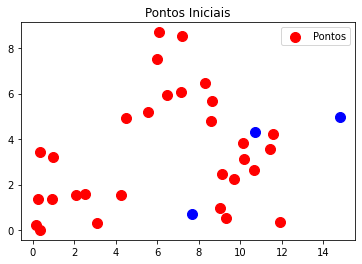

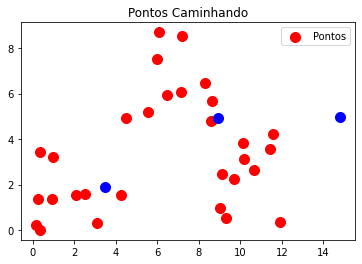

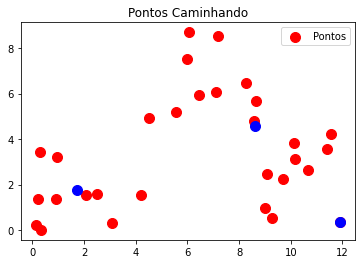

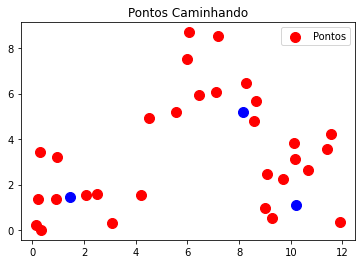

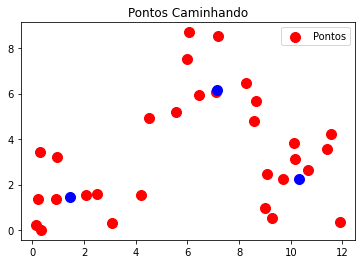

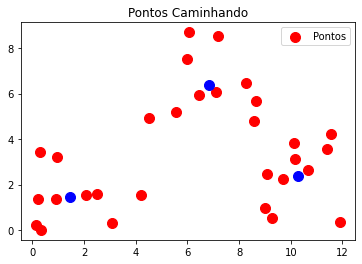

In [6]:
plt.scatter(cx, cy, label = 'Pontos', color = 'r', marker = 'o', s = 100)
plt.scatter(gx,gy,color='b',marker='o',s=100)
plt.title("Pontos Iniciais")
plt.legend()
plt.show()
cont=0
anterior = [0]
prox = []
while(cont<5 and anterior != prox):
  anterior = prox
  cont+=1
  prox = []
  menor = 20
  for i in range(30):
    prox.append(0)
    for j in range(3):
      aux = distancia(cx[i],cy[i],gx[j],gy[j])
      if(aux<menor or j==0):
        prox[i] = j
        menor = aux
  c1 = []
  c2 = []
  c3 = []
  for i in range(30):
    if(prox[i]==0):
      c1.append(i)
    elif(prox[i]==1):
      c2.append(i)    
    elif(prox[i]==2):
      c3.append(i)
  cS1 = []
  cS1.append(c1)
  cS1.append(c2)
  cS1.append(c3)
  for i in range(0,3):
    if(len(cS1[i])!=0):
      gx[i] = soma(cx,i,prox)/len(cS1[i])
      gy[i] = soma(cy,i,prox)/len(cS1[i])
  plt.scatter(cx, cy, label = 'Pontos', color = 'r', marker = 'o', s = 100)
  plt.scatter(gx,gy,color='b',marker='o',s=100)
  plt.title("Pontos Caminhando")
  plt.legend()
  plt.show()

Aqui está um grafico que mostra o centro, sua posição e seus pontos associados com mais clareza, sendo cada cor de um centro.

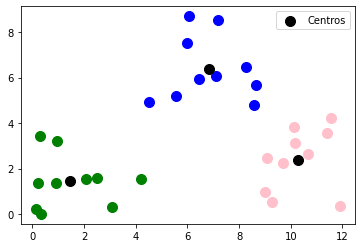

In [7]:
for i in range(len(prox)):
  if(prox[i]==0):
    plt.scatter(cx[i],cy[i], color = 'green', marker = 'o', s=100)
  elif(prox[i]==1):
    plt.scatter(cx[i],cy[i], color = 'pink', marker = 'o', s=100)
  elif(prox[i]==2):
    plt.scatter(cx[i],cy[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.show()

Para mostrar que dependendo da posição que for gerado o ponto, pode ser que o sistema não seja muito bem classificado, gerei 2 pontos aleatorios e um ponto mais distante dos outros.

In [24]:
gx = []
gy = []
gx.append(random.uniform(0,15))
gy.append(random.uniform(0,10))
gx.append(random.uniform(0,15))
gy.append(random.uniform(0,10))
gx.append(random.uniform(0,2))
gy.append(random.uniform(12,14))

Podemos ver aqui que um dos pontos ficou sem amostra, e outro ponto foi usado para classificar 2 das bases de amostra que foi criado anteriormente, o que pode significar numa classificação ruim.

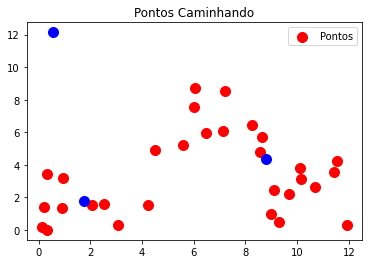

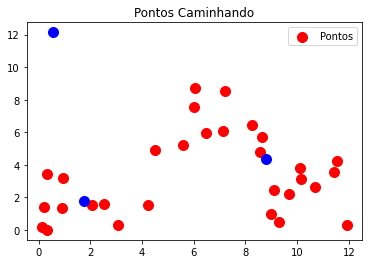

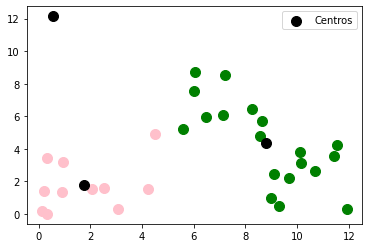

In [25]:

cont=0
anterior = [0]
prox = []
while(cont<5 and anterior != prox):
  anterior = prox
  cont+=1
  prox = []
  menor = 20
  for i in range(30):
    prox.append(0)
    for j in range(3):
      aux = distancia(cx[i],cy[i],gx[j],gy[j])
      if(aux<menor or j==0):
        prox[i] = j
        menor = aux
  c1 = []
  c2 = []
  c3 = []
  for i in range(30):
    if(prox[i]==0):
      c1.append(i)
    elif(prox[i]==1):
      c2.append(i)    
    elif(prox[i]==2):
      c3.append(i)
  cS1 = []
  cS1.append(c1)
  cS1.append(c2)
  cS1.append(c3)
  for i in range(0,3):
    if(len(cS1[i])!=0):
      gx[i] = soma(cx,i,prox)/len(cS1[i])
      gy[i] = soma(cy,i,prox)/len(cS1[i])
  plt.scatter(cx, cy, label = 'Pontos', color = 'r', marker = 'o', s = 100)
  plt.scatter(gx,gy,color='b',marker='o',s=100)
  plt.title("Pontos Caminhando")
  plt.legend()
  plt.show()
for i in range(len(prox)):
  if(prox[i]==0):
    plt.scatter(cx[i],cy[i], color = 'green', marker = 'o', s=100)
  elif(prox[i]==1):
    plt.scatter(cx[i],cy[i], color = 'pink', marker = 'o', s=100)
  elif(prox[i]==2):
    plt.scatter(cx[i],cy[i], color = 'blue', marker = 'o', s=100)
plt.scatter(gx,gy,label="Centros",color='black',marker='o',s=100)
plt.legend()
plt.show()